# Content-Based Recommendation Engine

This recommendation engine takes in a seed track and outputs track recommendations based on similarity measures

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [2]:
#read data
chart_tracks_df=pd.read_csv("data/spotify_daily_charts_tracks_rec_pool.csv")
chart_tracks_df = chart_tracks_df.dropna()
#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_rap_prob,predicted_reggae_prob,predicted_rnb_prob,predicted_rock_prob
0,4Q3d0fDDg6l9sqlAMVumgJ,Dumb Stuff,49tQo2QULno7gxHutgccqF,LANY,0HiwsXForePsWdIZW6EEkK,152248,2017-06-30,43,0.431,0.894,...,rock,0.998026,0.000030,0.000356,0.000285,0.000324,0.000044,0.000036,0.000899,0.998026
1,6qS0J555KgzxQ01E8x6vux,Swimming Pool - feat. Chito Miranda,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,0UeeygFdIo8k7PgxpLEGWI,217491,2021-08-29,48,0.225,0.852,...,rock,0.995345,0.000095,0.000734,0.002982,0.000515,0.000067,0.000018,0.000244,0.995345
2,4Z3qm2aWGTJuJKnv3EWwyD,Hide Away,6Dd3NScHWwnW6obMFbl1BH,Daya,2cE2eOy7alOZHpuelJEV8Q,192386,2017-01-06,43,0.886,0.818,...,reggae,0.994993,0.000467,0.000181,0.000153,0.000032,0.001043,0.994993,0.002944,0.000186
3,6Qyc6fS4DsZjB2mRW9DsQs,Iris,2sil8z5kiy4r76CRTXxBCA,The Goo Goo Dolls,4UMjBXcRqIgMZ1XumU2x5T,289533,1998-09-11,81,0.315,0.715,...,rock,0.994219,0.000033,0.001043,0.003540,0.000624,0.000173,0.000013,0.000355,0.994219
4,0GGfPhGuWC2JGc7hlvjLXa,Alapaap,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,1IalzI8USuu4PB679HVV5C,263000,1994-11-01,55,0.331,0.749,...,rock,0.992889,0.000074,0.000864,0.004801,0.000383,0.000411,0.000027,0.000550,0.992889


In [3]:
chart_tracks_df.shape

(4249, 30)

## 2. Input Seed Track


In [4]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [5]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=="Iris"].iloc[0]
seed_track_data#[feature_cols]

track_id                     6Qyc6fS4DsZjB2mRW9DsQs
track_name                                     Iris
artist_id                    2sil8z5kiy4r76CRTXxBCA
artist_name                       The Goo Goo Dolls
album_id                     4UMjBXcRqIgMZ1XumU2x5T
duration                                     289533
release_date                             1998-09-11
popularity                                       81
danceability                                  0.315
energy                                        0.715
key                                            11.0
loudness                                   0.662354
mode                                            0.0
speechiness                                  0.0362
acousticness                                0.00125
instrumentalness                           0.000008
liveness                                     0.0942
valence                                       0.497
tempo                                      0.640448
predicted_ge

## 3. Explore Similarity Measures

In [6]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

##### Approach 1: Use audio features only

Euclidean

In [7]:
seed_track_data[feature_cols].values.reshape(-1, 1)

array([[0.315],
       [0.715],
       [0.6623541453428863],
       [0.0362],
       [0.00125],
       [7.97e-06],
       [0.0942],
       [0.497],
       [0.6404480042782829]], dtype=object)

In [8]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
120,Christmas Lights,Coldplay,0.000,rock,0.315,0.418,0.618383,0.0299,0.1310,0.000679,0.0836,0.2370,0.477527
2085,tolerate it,Taylor Swift,0.001,jazz,0.316,0.361,0.567820,0.0488,0.8780,0.000027,0.0797,0.2210,0.148366
3543,Ikaw Ang Aking Mahal - Recorded at Kodama Stud...,juan karlos,0.001,country,0.314,0.505,0.681883,0.0374,0.0627,0.000509,0.1170,0.2010,0.159348
3544,"How Far I'll Go - From ""Moana""",Alessia Cara,0.001,rap,0.314,0.555,0.599754,0.3700,0.1570,0.000108,0.0670,0.1590,0.784725
1555,Oks Lang,John Roa,0.002,jazz,0.313,0.237,0.397625,0.0451,0.8550,0.000386,0.0961,0.1650,0.179834
1556,Oks Lang,John Roa,0.002,jazz,0.313,0.237,0.397625,0.0451,0.8550,0.000386,0.0961,0.1650,0.179834
461,O Holy Night,Regine Velasquez,0.002,jazz,0.313,0.136,0.446264,0.0371,0.8900,0.000009,0.0713,0.1980,0.187497
1689,Make You Feel My Love,Adele,0.002,jazz,0.317,0.172,0.557380,0.0326,0.9070,0.000383,0.1050,0.0963,0.088981
506,White Christmas,Bing Crosby,0.002,classical,0.317,0.158,0.317912,0.0381,0.6730,0.353000,0.3380,0.2470,0.485956
610,A Million Dreams,P!nk,0.003,rock,0.312,0.499,0.735640,0.0397,0.2720,0.000000,0.0901,0.1910,0.593338


Manhattan

In [9]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
120,Christmas Lights,Coldplay,0.000,rock,0.315,0.418,0.618383,0.0299,0.1310,0.000679,0.0836,0.2370,0.477527
3543,Ikaw Ang Aking Mahal - Recorded at Kodama Stud...,juan karlos,0.001,country,0.314,0.505,0.681883,0.0374,0.0627,0.000509,0.1170,0.2010,0.159348
2085,tolerate it,Taylor Swift,0.001,jazz,0.316,0.361,0.567820,0.0488,0.8780,0.000027,0.0797,0.2210,0.148366
3544,"How Far I'll Go - From ""Moana""",Alessia Cara,0.001,rap,0.314,0.555,0.599754,0.3700,0.1570,0.000108,0.0670,0.1590,0.784725
506,White Christmas,Bing Crosby,0.002,classical,0.317,0.158,0.317912,0.0381,0.6730,0.353000,0.3380,0.2470,0.485956
1556,Oks Lang,John Roa,0.002,jazz,0.313,0.237,0.397625,0.0451,0.8550,0.000386,0.0961,0.1650,0.179834
1689,Make You Feel My Love,Adele,0.002,jazz,0.317,0.172,0.557380,0.0326,0.9070,0.000383,0.1050,0.0963,0.088981
461,O Holy Night,Regine Velasquez,0.002,jazz,0.313,0.136,0.446264,0.0371,0.8900,0.000009,0.0713,0.1980,0.187497
1555,Oks Lang,John Roa,0.002,jazz,0.313,0.237,0.397625,0.0451,0.8550,0.000386,0.0961,0.1650,0.179834
2905,Hold On Tight,R3HAB,0.003,jazz,0.318,0.647,0.700839,0.0476,0.4540,0.000000,0.1790,0.5280,0.221365


Cosine

In [10]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
115,The Other Side Of The Door (Taylor’s Version),Taylor Swift,0.002911,rock,0.432,0.873,0.814043,0.0577,0.027900,0.000000,0.1670,0.629,0.689132
377,The Way I Loved You (Taylor’s Version),Taylor Swift,0.004359,rock,0.402,0.732,0.801842,0.0484,0.003300,0.000000,0.1080,0.472,0.671484
73,Wonderwall - Remastered,Oasis,0.005171,rock,0.378,0.896,0.826366,0.0407,0.000452,0.000000,0.1940,0.469,0.752127
762,DON’T CALL ME AGAIN,TWICE,0.005739,rock,0.516,0.902,0.800983,0.1750,0.001460,0.000053,0.1120,0.613,0.834599
761,DON'T CALL ME AGAIN,TWICE,0.005739,rock,0.516,0.902,0.800983,0.1750,0.001460,0.000053,0.1120,0.613,0.834599
974,Say It Again,Marié Digby,0.006901,rock,0.461,0.859,0.862641,0.0364,0.056100,0.000000,0.1240,0.789,0.738709
607,P.O.P (Piece Of Peace) Pt. 1,j-hope,0.007011,rock,0.547,0.845,0.776131,0.0866,0.006520,0.000002,0.0604,0.670,0.761328
41,Ipagpatawad Mo,Mayonnaise,0.007423,rock,0.291,0.755,0.790174,0.0500,0.062100,0.000000,0.0836,0.457,0.576140
40,Ipagpatawad Mo,Mayonnaise,0.007423,rock,0.291,0.755,0.790174,0.0500,0.062100,0.000000,0.0836,0.457,0.576140
1,Swimming Pool - feat. Chito Miranda,Ben&Ben,0.007725,rock,0.225,0.852,0.774903,0.0724,0.000987,0.000001,0.0950,0.462,0.654741


View histograms of the 3 similarity measures

array([[<AxesSubplot:title={'center':'euclidean_dist'}>,
        <AxesSubplot:title={'center':'manhattan_dist'}>],
       [<AxesSubplot:title={'center':'cosine_dist'}>, <AxesSubplot:>]],
      dtype=object)

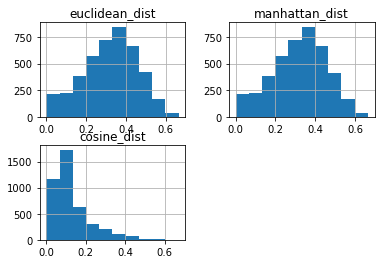

In [11]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Approach 2: Audio features and with same predicted genre

In [14]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

/var/folders/lt/_vxm7m7x0hs2v8mx_0zxl5vc0000gn/T/ipykernel_16936/273483882.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
115,The Other Side Of The Door (Taylor’s Version),Taylor Swift,0.117,rock,0.432,0.873,0.814043,0.0577,0.027900,0.000000,0.1670,0.629,0.689132
377,The Way I Loved You (Taylor’s Version),Taylor Swift,0.087,rock,0.402,0.732,0.801842,0.0484,0.003300,0.000000,0.1080,0.472,0.671484
73,Wonderwall - Remastered,Oasis,0.063,rock,0.378,0.896,0.826366,0.0407,0.000452,0.000000,0.1940,0.469,0.752127
761,DON'T CALL ME AGAIN,TWICE,0.201,rock,0.516,0.902,0.800983,0.1750,0.001460,0.000053,0.1120,0.613,0.834599
762,DON’T CALL ME AGAIN,TWICE,0.201,rock,0.516,0.902,0.800983,0.1750,0.001460,0.000053,0.1120,0.613,0.834599
974,Say It Again,Marié Digby,0.146,rock,0.461,0.859,0.862641,0.0364,0.056100,0.000000,0.1240,0.789,0.738709
607,P.O.P (Piece Of Peace) Pt. 1,j-hope,0.232,rock,0.547,0.845,0.776131,0.0866,0.006520,0.000002,0.0604,0.670,0.761328
41,Ipagpatawad Mo,Mayonnaise,0.024,rock,0.291,0.755,0.790174,0.0500,0.062100,0.000000,0.0836,0.457,0.576140
40,Ipagpatawad Mo,Mayonnaise,0.024,rock,0.291,0.755,0.790174,0.0500,0.062100,0.000000,0.0836,0.457,0.576140
1,Swimming Pool - feat. Chito Miranda,Ben&Ben,0.090,rock,0.225,0.852,0.774903,0.0724,0.000987,0.000001,0.0950,0.462,0.654741


##### Approach 3: Predicted genre probabilities

In [15]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
genre_cols

['predicted_classical_prob',
 'predicted_country_prob',
 'predicted_electronic_prob',
 'predicted_jazz_prob',
 'predicted_rap_prob',
 'predicted_reggae_prob',
 'predicted_rnb_prob',
 'predicted_rock_prob']

In [16]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = genre_cols
#cosine distance of audio features and predicted genre probabilities
chart_tracks_df['cosine_dist_mod1'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod1')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_mod1','predicted_genre']+cols]

,track_id,track_name,artist_name,cosine_dist_mod1,predicted_genre,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_rap_prob,predicted_reggae_prob,predicted_rnb_prob,predicted_rock_prob
1,6qS0J555KgzxQ01E8x6vux,Swimming Pool - feat. Chito Miranda,Ben&Ben,2.281306e-07,rock,0.000095,0.000734,0.002982,0.000515,0.000067,0.000018,0.000244,0.995345
4,0GGfPhGuWC2JGc7hlvjLXa,Alapaap,Eraserheads,9.059820e-07,rock,0.000074,0.000864,0.004801,0.000383,0.000411,0.000027,0.000550,0.992889
6,751srcHf5tUqcEa9pRCQwP,Tek It,Cafuné,2.525349e-06,rock,0.000033,0.003139,0.002965,0.000240,0.000168,0.000027,0.000681,0.992748
0,4Q3d0fDDg6l9sqlAMVumgJ,Dumb Stuff,LANY,5.807089e-06,rock,0.000030,0.000356,0.000285,0.000324,0.000044,0.000036,0.000899,0.998026
10,0md12GKBGH8ZuLG2fTfGUz,Dreams,The Cranberries,1.314521e-05,rock,0.000028,0.005620,0.002043,0.001432,0.001328,0.000593,0.000746,0.988210
12,6mS8cd33jFrighnLc0obxQ,Ghosting,TOMORROW X TOGETHER,1.389967e-05,rock,0.000051,0.006186,0.003783,0.000692,0.000218,0.000071,0.001082,0.987917
15,0jiPKUSdsJNCxMPHjMqptk,Christmas (Baby Please Come Home),Darlene Love,2.539236e-05,rock,0.000095,0.005144,0.002134,0.002545,0.000578,0.000167,0.005496,0.983840
19,1SZuNx9TtE5da7twgYkKAq,Take That Man,IV Of Spades,3.484983e-05,rock,0.000051,0.008352,0.006975,0.000520,0.000346,0.000110,0.001565,0.982081
30,4AQzk2yNWKs6sYhZi6NzVN,Me & You Together Song,The 1975,4.070516e-05,rock,0.000192,0.005243,0.006089,0.001263,0.001444,0.000503,0.007487,0.977779
20,5W1v9jC51rDMKevEjqgKZ4,Jopay,Mayonnaise,4.234889e-05,rock,0.000079,0.004240,0.011905,0.000284,0.000868,0.000052,0.000624,0.981947


##### Approach 4: Audio features and predicted genre probabilities

In [17]:
feature_cols + genre_cols

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'predicted_classical_prob',
 'predicted_country_prob',
 'predicted_electronic_prob',
 'predicted_jazz_prob',
 'predicted_rap_prob',
 'predicted_reggae_prob',
 'predicted_rnb_prob',
 'predicted_rock_prob']

In [18]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
#cosine distance of audio features and predicted genre probabilities
chart_tracks_df['cosine_dist_mod2'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod2')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_mod2','predicted_genre']+cols]

,track_id,track_name,artist_name,cosine_dist_mod2,predicted_genre,danceability,energy,loudness,speechiness,acousticness,...,valence,tempo,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_rap_prob,predicted_reggae_prob,predicted_rnb_prob,predicted_rock_prob
41,7aOgo3FixklrEF0FWCgPLX,Ipagpatawad Mo,Mayonnaise,0.005198,rock,0.291,0.755,0.790174,0.0500,0.062100,...,0.457,0.576140,0.000164,0.012935,0.012502,0.001013,0.000323,0.000067,0.001220,0.971777
40,7IqUmDJ2GjaOqrzDCXhrV5,Ipagpatawad Mo,Mayonnaise,0.005198,rock,0.291,0.755,0.790174,0.0500,0.062100,...,0.457,0.576140,0.000164,0.012935,0.012502,0.001013,0.000323,0.000067,0.001220,0.971777
1,6qS0J555KgzxQ01E8x6vux,Swimming Pool - feat. Chito Miranda,Ben&Ben,0.005836,rock,0.225,0.852,0.774903,0.0724,0.000987,...,0.462,0.654741,0.000095,0.000734,0.002982,0.000515,0.000067,0.000018,0.000244,0.995345
146,3Qqsr0Xu0Ts6AaC1XqMFC8,It Was Love,LANY,0.007181,rock,0.439,0.721,0.705548,0.0777,0.026500,...,0.438,0.531437,0.000195,0.022963,0.027432,0.001454,0.004608,0.000260,0.006037,0.937051
88,43ay9lQZ5rfNcOOHhRF2cM,The Greatest Show,Hugh Jackman,0.007430,rock,0.417,0.824,0.691505,0.1050,0.000239,...,0.400,0.652572,0.000073,0.004878,0.033779,0.000868,0.001079,0.000095,0.002744,0.956484
115,1cSFlSBdpT4F5vb1frQ231,The Other Side Of The Door (Taylor’s Version),Taylor Swift,0.008401,rock,0.432,0.873,0.814043,0.0577,0.027900,...,0.629,0.689132,0.000119,0.044857,0.005026,0.001055,0.000514,0.000160,0.001430,0.946838
73,5qqabIl2vWzo9ApSC317sa,Wonderwall - Remastered,Oasis,0.008527,rock,0.378,0.896,0.826366,0.0407,0.000452,...,0.469,0.752127,0.000183,0.032981,0.003969,0.000725,0.000184,0.000095,0.000584,0.961278
57,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,0.010250,rock,0.336,0.627,0.687288,0.0384,0.164000,...,0.350,0.606100,0.000173,0.010988,0.014488,0.002136,0.000599,0.000075,0.004179,0.967363
377,22bPsP2jCgbLUvh82U0Z3M,The Way I Loved You (Taylor’s Version),Taylor Swift,0.010478,rock,0.402,0.732,0.801842,0.0484,0.003300,...,0.472,0.671484,0.000337,0.095640,0.036936,0.001883,0.002262,0.000402,0.004431,0.858107
20,5W1v9jC51rDMKevEjqgKZ4,Jopay,Mayonnaise,0.011311,rock,0.348,0.780,0.729785,0.0314,0.000320,...,0.301,0.529200,0.000079,0.004240,0.011905,0.000284,0.000868,0.000052,0.000624,0.981947


In [19]:
recommendation_df['track_id'].values

array(['7aOgo3FixklrEF0FWCgPLX', '7IqUmDJ2GjaOqrzDCXhrV5',
       '6qS0J555KgzxQ01E8x6vux', '3Qqsr0Xu0Ts6AaC1XqMFC8',
       '43ay9lQZ5rfNcOOHhRF2cM', '1cSFlSBdpT4F5vb1frQ231',
       '5qqabIl2vWzo9ApSC317sa', '0bYg9bo50gSsH3LtXe2SQn',
       '22bPsP2jCgbLUvh82U0Z3M', '5W1v9jC51rDMKevEjqgKZ4'], dtype=object)